In [87]:
csv_file = '/home/gio/recordings/MG81/doc/elec/xltek_elec_names.csv'

with open(csv_file, 'r') as f:
    l = f.readline()
chan = [x.strip() for x in l.split(',')][1:]

In [104]:
idx = 82

chan[idx - 1]

'MFD1'

In [4]:
from pathlib import Path
from phypno.viz import Viz3
from phypno.attr import Surf

In [36]:
s_l = Surf('/home/gio/projects/spgr/group/fsaverage/EM09/surf/lh.fsaverage_sym.sphere.reg')
print(s_l.vert.shape)
s_r = Surf('/home/gio/projects/spgr/group/fsaverage/EM09/surf/rh.fsaverage_sym.sphere.reg')
print(s_r.vert.shape)

(171672, 3)
(158992, 3)


In [38]:
s_l = Surf('/home/gio/projects/spgr/group/fsaverage/EM09/xhemi/surf/lh.fsaverage_sym.sphere.reg')
print(s_l.vert.shape)
s_r = Surf('/home/gio/projects/spgr/group/fsaverage/EM09/xhemi/surf/rh.fsaverage_sym.sphere.reg')
print(s_r.vert.shape)

(158992, 3)
(171672, 3)


In [18]:
sym = Path('/opt/freesurfer/subjects/fsaverage_sym/surf')
sym_lh_pial = Surf(str(sym.joinpath('lh.pial')))
sym_lh_sphere = Surf(str(sym.joinpath('lh.sphere')))
sym_rh_pial = Surf(str(sym.joinpath('rh.pial')))
sym_rh_sphere = Surf(str(sym.joinpath('rh.sphere')))

In [20]:
avg = Path('/opt/freesurfer/subjects/fsaverage/surf')
avg_lh_pial = Surf(str(avg.joinpath('lh.pial')))
avg_lh_sphere = Surf(str(avg.joinpath('lh.sphere')))
avg_rh_pial = Surf(str(avg.joinpath('rh.pial')))
avg_rh_sphere = Surf(str(avg.joinpath('rh.sphere')))

In [80]:
v = Viz3()
v.add_surf(avg_lh_pial)

In [33]:
v = Viz3()
v.add_surf(avg_lh_sphere, values=avg_lh_pial.vert[:, 0])

In [34]:
v1 = Viz3()
v2.add_surf(avg_rh_sphere, values=avg_rh_pial.vert[:, 0])

In [31]:
v = Viz3()
v.add_surf(sym_lh_sphere, values=sym_lh_pial.vert[:, 0])

In [32]:
v2 = Viz3()
v2.add_surf(sym_rh_sphere, values=sym_rh_pial.vert[:, 0])

In [23]:
v._widget.opts['center'][0] = 0

(163842, 3)

In [40]:
from os import system
system('ln -s /home/gio/projects/spgr/group/fsaverage/EM09/xhemi /home/gio/projects/spgr/group/fsaverage/EM09_xhemi')

0

In [45]:
system('ln -s /home/gio/projects/spgr/group/fsaverage/EM09_xhemi/surf/lh.fsaverage_sym.sphere.reg /home/gio/projects/spgr/group/fsaverage/EM09_xhemi/surf/lh.sphere.reg')
system('ln -s /home/gio/projects/spgr/group/fsaverage/EM09_xhemi/surf/rh.fsaverage_sym.sphere.reg /home/gio/projects/spgr/group/fsaverage/EM09_xhemi/surf/rh.sphere.reg')

0

In [43]:
from mne.surface import read_morph_map

<function mne.surface.read_morph_map>

In [46]:
read_morph_map('EM09_xhemi', 'fsaverage_sym', '/home/gio/projects/spgr/group/fsaverage')

Morph map "/home/gio/projects/spgr/group/fsaverage/morph-maps/fsaverage_sym-EM09_xhemi-morph.fif" does not exist, creating it and saving it to disk (this may take a few minutes)
Creating morph map EM09_xhemi -> fsaverage_sym
Creating morph map fsaverage_sym -> EM09_xhemi


[<163842x158992 sparse matrix of type '<class 'numpy.float64'>'
 	with 491526 stored elements in Compressed Sparse Row format>,
 <163842x171672 sparse matrix of type '<class 'numpy.float64'>'
 	with 491526 stored elements in Compressed Sparse Row format>]

In [50]:
orig = Surf('/home/gio/projects/spgr/group/fsaverage/EM09/surf/lh.pial')
val = orig.vert[:, 1]

In [72]:
from phypno import Data
from numpy import arange
data = Data(val, s_freq=100, surf=arange(len(val)))

In [55]:
xhemi_rh = Surf('/home/gio/projects/spgr/group/fsaverage/EM09_xhemi/surf/rh.sphere.reg')

In [56]:
v = Viz3()
v.add_surf(xhemi_rh, values=val)

In [57]:
from phypno.source import Morph

In [70]:
morph = Morph(xhemi_rh, to_surf='fsaverage_sym')

In [73]:
mdata = morph(data)

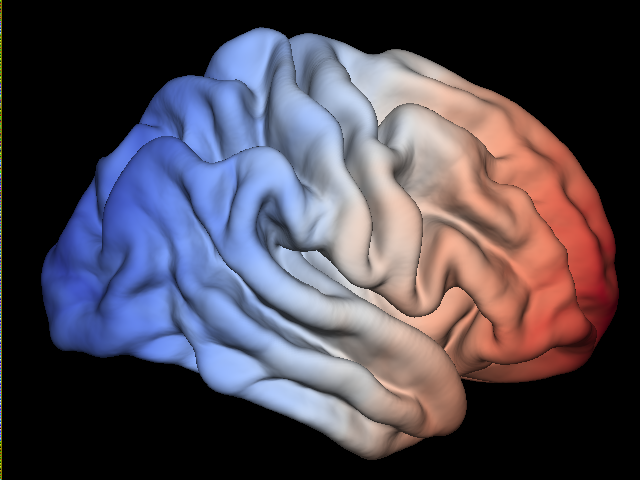

In [79]:
v = Viz3()
v.add_surf(sym_rh_pial, values=mdata(trial=0)[163842:])
v